In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np 

# Q 7] Calculate Mean, Median, Mode, Variance, Standard Deviation & Range 

In [17]:
data = pd.read_csv('Q7.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

moments = pd.DataFrame([data.mean().values,
                        data.median().values,
                        data.mode().values[0],
                        data.var().values,
                        data.std().values,
                        (data.max()-data.min()).values],
                        columns=data.columns)
moments.insert(0,column='Moments',value=np.array(['Mean',
                                                  'Median',
                                                  'Mode',
                                                  'Variance',
                                                  'Standard Dev',
                                                  'Range']).reshape(6,1))
moments

,Moments,Points,Score,Weigh
0,Mean,3.596563,3.217250,17.848750
1,Median,3.695000,3.325000,17.710000
2,Mode,3.070000,3.440000,17.020000
3,Variance,0.285881,0.957379,3.193166
4,Standard Dev,0.534679,0.978457,1.786943
5,Range,2.170000,3.911000,8.400000


# Q 9] Calculate Skewness, Kurtosis 

### Q9 A]

In [23]:
data = pd.read_csv('Q9_a.csv')
data.drop('Index',axis=1,inplace=True)
moments = pd.DataFrame([data.skew().values,
                        data.kurt().values],
                        columns = data.columns)
moments.insert(0,column='Moments',value=np.array(['Skew',
                                                  'Kurtosis']).reshape(2,1))
moments

,Moments,speed,dist
0,Skew,-0.117510,0.806895
1,Kurtosis,-0.508994,0.405053


### Q9 B]

In [24]:
data = pd.read_csv('Q9_b.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
moments = pd.DataFrame([data.skew().values,
                        data.kurt().values],
                        columns = data.columns)
moments.insert(0,column='Moments',value=np.array(['Skew',
                                                  'Kurtosis']).reshape(2,1))
moments

,Moments,SP,WT
0,Skew,1.611450,-0.614753
1,Kurtosis,2.977329,0.950291


# Q 11] Calculate 94%,98%,96% confidence interval

In [49]:
def CI(ci):
    # since sample size > 30, using stats.norm for CI calculations.
    return stats.norm.interval(confidence=round(ci/100,2),loc=mean,scale=std)
ci = [94,98,96]
mean = 200
std = 30
confidenceInterval = pd.DataFrame([[x]+list(CI(x)) for x in ci],
                                columns=['Cofidence interval',
                                         'Start point',
                                         'End point'])
confidenceInterval

,Cofidence interval,Start point,End point
0,94,143.576192,256.423808
1,98,130.209564,269.790436
2,96,138.387533,261.612467


# Q 12] 1)	Find mean, median, variance, standard deviation

In [36]:
calc = [['Mean',np.mean],
        ['Median',np.median],
        ['Variance',np.var],
        ['Standard Deviation',np.std]]
scores = np.array([34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56])
moments = pd.DataFrame([[x[0],round(x[1](scores),2)] for x in calc],
                      columns=['moments','values'])
moments

,moments,values
0,Mean,41.00
1,Median,40.50
2,Variance,24.11
3,Standard Deviation,4.91


# Q 20) Calculate the probability of MPG  of Cars for the below cases.

In [80]:
cars = pd.read_csv('Cars.csv')

def cdf(x):
    return stats.norm.cdf(x,loc=cars.describe().loc['mean']['MPG'],
                          scale=cars.describe().loc['std']['MPG'])
prob = pd.DataFrame([['P(MPG) > 38',1-cdf(38)],
                     ['P(MPG) < 40',cdf(40)],
                     ['P(20<MPG<50)',cdf(50)-cdf(20)]],
                     columns=['condition','Probablity'])
prob

,condition,Probablity
0,P(MPG) > 38,0.347594
1,P(MPG) < 40,0.729350
2,P(20<MPG<50),0.898869


# Q 21] Check whether the data follows normal distribution

### Q 21] a] Check whether the MPG of Cars follows Normal Distribution 

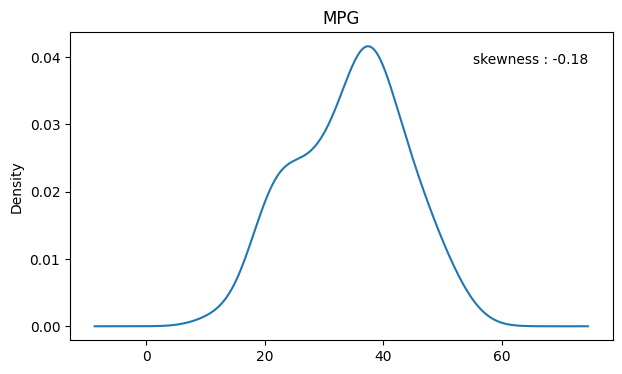

In [151]:
cars = pd.read_csv('Cars.csv')

mpg = cars.MPG
plt.figure(figsize=(7,4))
mpg.plot(kind='kde')
plt.figtext(0.7,0.8,f'skewness : {round(mpg.skew(),2)}')
plt.title('MPG')
plt.show()
# it can be inferred from visual
# as well as statical inspection
# that MPG dataset indeed 
# follows normal distribution

### Q 21] b]  Check Whether the Adipose Tissue (AT) and Waist Circumference(Waist)  from wc-at data set  follows Normal Distribution

In [154]:
data = pd.read_csv('wc-at.csv')

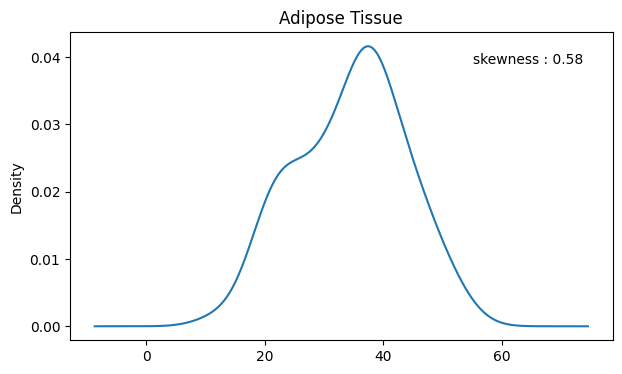

In [152]:
at = data.AT
plt.figure(figsize=(7,4))
mpg.plot(kind='kde')
plt.figtext(0.7,0.8,f'skewness : {round(at.skew(),2)}')
plt.title('Adipose Tissue')
plt.show()
# it can be inferred from visual
# as well as statical inspection
# that Adipose tissue dataset indeed 
# follows normal distribution

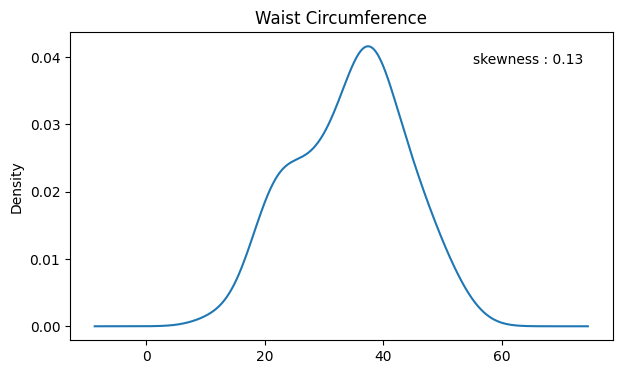

In [153]:
waist = data.Waist
plt.figure(figsize=(7,4))
mpg.plot(kind='kde')
plt.figtext(0.7,0.8,f'skewness : {round(waist.skew(),2)}')
plt.title('Waist Circumference')
plt.show()
# it can be inferred from visual
# as well as statical inspection
# that Waist Circumference dataset indeed 
# follows normal distribution

# Q 22 ] Calculate the Z scores of  90%,94% & 60% confidence interval 

In [11]:
def zScore(cl):
    return round(stats.norm.ppf((1+cl/100)/2),2)
CI = [60,95,96]
zscore = pd.DataFrame([[x, zScore(x)] for x in CI],
                      columns=['CI','Z-Score'])
zscore

,CI,Z-Score
0,60,0.84
1,95,1.96
2,96,2.05


# Q 23 ] Calculate the T scores of  90%,94% & 60% confidence interval 

In [39]:
sampleSize = 25
CI = [95,96,99]
def tScore(cl):
    global sampleSize
    return round(stats.t.ppf((1+cl/100)/2,df = sampleSize-1),2)
tscore = pd.DataFrame([[x, tScore(x)] for x in CI],
                      columns=['CI',f'T-Score for N = {sampleSize}'])
tscore

,CI,T-Score for N = 25
0,95,2.06
1,96,2.17
2,99,2.80


# Q 24] probability that 18 randomly selected bulbs would have an average life of no more than 260 days

In [55]:
sampleSize = 18
xBar = 260
S = 90
prob = pd.DataFrame([['P(aveLife <= 260)',
                     stats.t.cdf(xBar,df=sampleSize-1,scale=S)]],
                   columns=['condition','Probability'])
prob

,condition,Probability
0,P(aveLife <= 260),0.9949
